In [ ]:
Netflix_Visual_Analytics/
│
├── data/
│   ├── Netflix_shows_movies.csv
│
├── python/
│   ├── netflix_analysis.py
│
├── r/
│   ├── netflix_visualization.R
│
├── outputs/
│   ├── genres_distribution.png
│   ├── ratings_distribution.png
│
├── README.md

1️⃣ Data Preparation (Python)
import zipfile
import os

zip_path = "Netflix_Data.zip"
extract_path = "data"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Rename file
old_name = "data/netflix_titles.csv"
new_name = "data/Netflix_shows_movies.csv"
os.rename(old_name, new_name)

2️⃣ Data Cleaning (Python)

import pandas as pd

df = pd.read_csv("data/Netflix_shows_movies.csv")

# Check missing values
print(df.isnull().sum())

# Fill missing values
df['director'].fillna("Unknown", inplace=True)
df['cast'].fillna("Not Available", inplace=True)
df['country'].fillna("Unknown", inplace=True)
df.dropna(subset=['rating'], inplace=True)

print("Missing values handled successfully.")

3️⃣ Data Exploration (Python)

# Basic info
print(df.info())

# Statistical summary
print(df.describe())

# Count movies vs TV shows
print(df['type'].value_counts())

# Most common genres
df['listed_in'].value_counts().head(10)




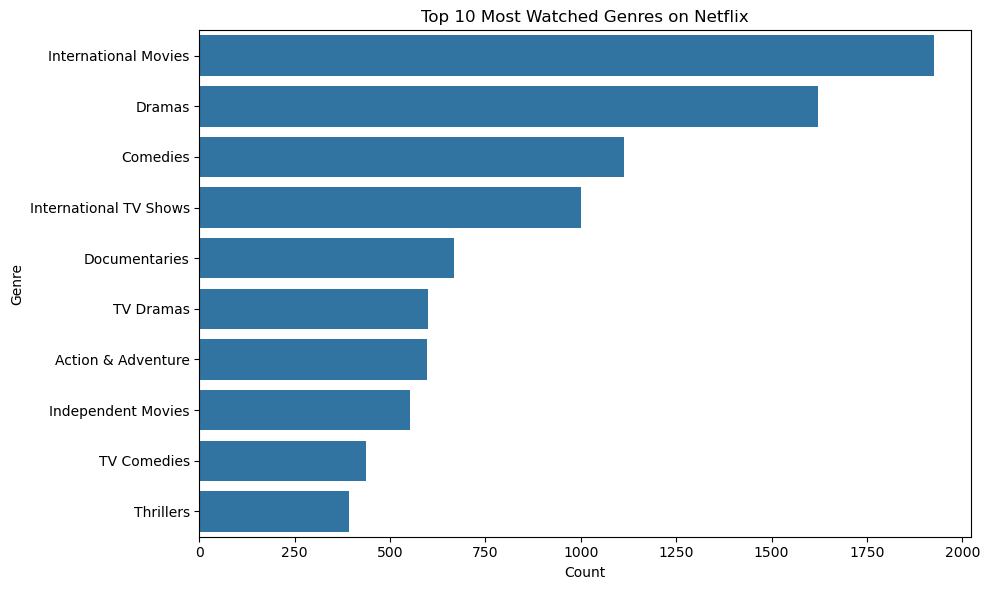

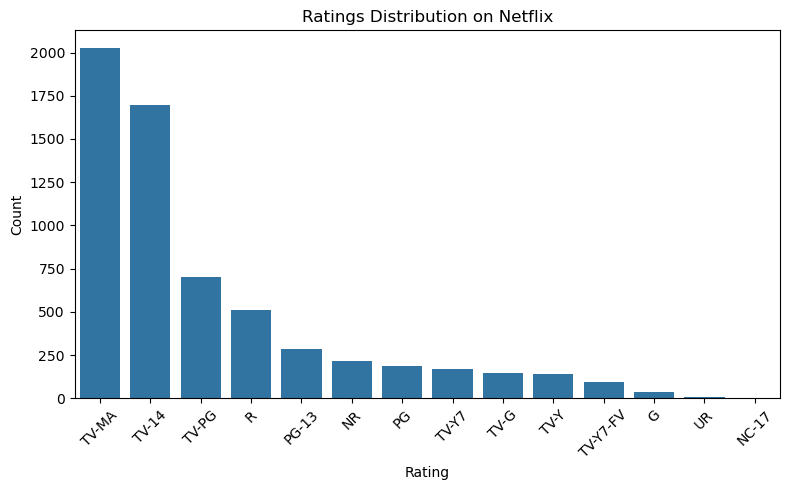

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create genre column safely
genres = (
    df['listed_in']
    .str.split(', ')
    .explode()
    .reset_index(drop=True)
)

genres_df = pd.DataFrame({'genre': genres})

# Plot
plt.figure(figsize=(10,6))
sns.countplot(
    y='genre',
    data=genres_df,
    order=genres_df['genre'].value_counts().head(10).index
)

plt.title("Top 10 Most Watched Genres on Netflix")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,5))
sns.countplot(x='rating', data=df, order=df['rating'].value_counts().index)
plt.title("Ratings Distribution on Netflix")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("outputs/ratings_distribution.png")
plt.show()

In [10]:
import os

os.makedirs("outputs", exist_ok=True)
